## Q1: Simple numerical integral

Consider the function $f(x) = e^{-x^2}$.  We want to integrate this from $[-5, 5]$.  The
analytic integral is not easily obtained.  Use `integrate.quad` to do the integration.

In [15]:
from scipy import integrate
import numpy as np

def fun(x):
    return np.exp(-x**2)

I, err = integrate.quad(fun, -5.0, 5.0, epsabs=1.e-13, epsrel=1.e-13)
print('Integral of the function: ' +str(I))
print('Error of the integral: '+str(err))

Integral of the function: 1.7724538509027912
Error of the integral: 4.6261378229003154e-14


Consider now that you have data that represents a function sampled a `N` points, but you don't know the analytic form of the function.  Here, we create the sampling here for a Gaussian and we will do the same 

Compute the integral of this sampled function using Simpson's method (`integrate.simps`).  Now, vary the number of sample points (try 64, 128, ...) and see how the answer changes.  Simpson's method is 4-th order accurate, which means that the error should decrease by $2^4$ when we double the number of sample points

In [2]:
N = 32
x = np.linspace(-5, 5, N)
f = np.exp(-x**2)

In [3]:
#integration at 32 points
I2= integrate.simps(f,x)
print('Integral of f at 32 points: '+str(I2))

Integral of f at 32 points: 1.7724538509168974


[1.41062717e-11 8.23341395e-13 7.37188088e-14 7.54951657e-15]


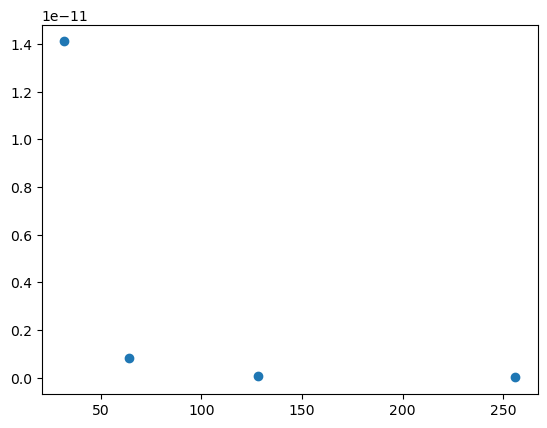

In [17]:
import matplotlib.pyplot as plt

N=[32,64,128,256]
In = np.zeros(len(N))
err = np.zeros(len(N))

for i in range(0, len(N)):
    xn = np.linspace(-5, 5, N[i])
    fn = np.exp(-xn**2)
    In[i]= integrate.simps(fn,xn)
    err[i]=np.abs(I-In[i])

plt.scatter(N,err)
print(err)
#The difference becmes comparable to the error of integrate.quad

## Q7: Noisy signal

A common use of a convolution is to smooth noisy data, for example by convolving noisy data with a Gaussian.  We'll do that here.

Here's some noisy data we'll work with

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def fdata(x, L):
    A = L/10.0
    return 2*np.sin(2*np.pi*x/L) + x*(L-x)**2/L**3 * np.cos(x) + \
           5*x*(L-x)/L**2 + A/2 + 0.1*A*np.sin(13*np.pi*x/L)

N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5*np.random.randn(N)

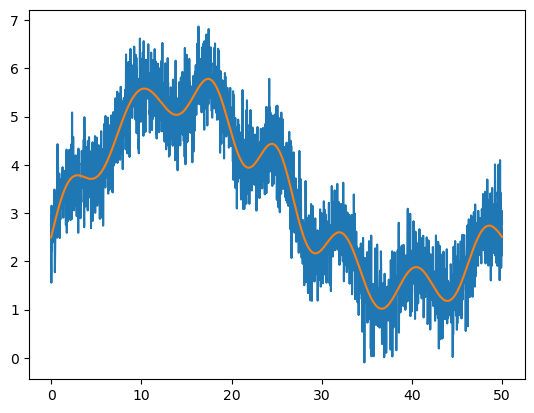

In [4]:
plt.plot(x, noisy)
plt.plot(x, orig)

Convolve the noisy data with a Gaussian and plot the result together with the original data `orig`.  You'll need to play with the width of the Gaussian to get a nice smoothing.  You also will need to normalize the Gaussian so that it sums to 1, otherwise, your convolved data will be shifted verfically from the original function.

In [7]:
from scipy import signal
from scipy import integrate
#help(signal.convolve)

Integral of the convolved gaussian: 1.0


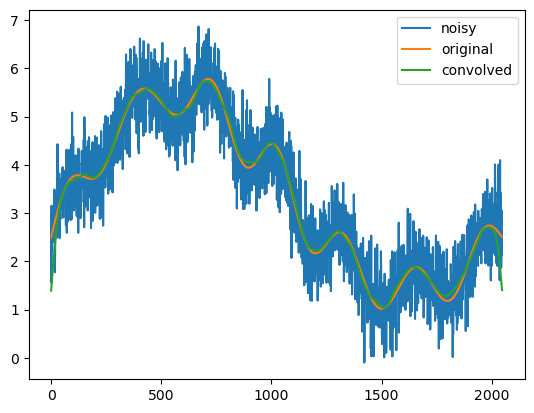

In [29]:
Std= 20

gaus=signal.gaussian(500,std=Std)  #genero la gaussiana
#plt.plot(gaus)
norm=integrate.simps(gaus)
#print(norm)
gaus[:]=gaus[:]/norm #normalizzo la gaussiana
norm2=integrate.simps(gaus)
print('Integral of the convolved gaussian: ' + str(norm2))

Conv = signal.convolve(noisy, gaus, mode='same', method='auto')
plt.plot(noisy, label='noisy')
plt.plot(orig, label='original')
plt.plot(Conv, label='convolved')
plt.legend(loc="upper right")
